<a href="https://colab.research.google.com/github/Alexandre-Delplanque/TFE-2020/blob/master/Model_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object detection
---
Utilisation de "[mmdetection](https://github.com/open-mmlab/mmdetection.git)". Mmdetection s'utilise normalement sur Linux (Windows n'est pas encore supporté), Colab est donc une bonne alternative pour les utilisateurs de Windows.

Au préalable, télécharger puis loader sur Google Drive, [cette version](https://github.com/open-mmlab/mmdetection/tree/c0ac99eff015c108b34a9f80e3ff59b106dbc62e) encore non-officielle du repository. Cette version permet d'utiliser l'entiereté des réseaux, sans apparition d'erreurs.

Une partie du code est prévue pour copier ce dossier de fichier vers `/content/mmdetection_update` afin d'éviter de modifier les fichiers sources originales dans le drive.




# Connection à "My Drive"

In [1]:
# Connection à mon drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# URL vers le(s) repo(s) et définition des chemins d'accès


In [1]:
# --------------------------------------------------------
# URL vers le(s) repo(s) et définition des chemins d'accès
# --------------------------------------------------------
import os
from os.path import exists, join, basename, splitext
import shutil

# URL du repo de la data
git_repo_data = 'https://github.com/Alexandre-Delplanque/TFE-2020.git' 

# Chemin d'accès vers mmdetection
%cd /content
data_dir = os.path.abspath(splitext(basename(git_repo_data))[0])
print("Data path : {}".format(data_dir))

# Chemin d'accès vers mmdetection
mmdetection_dir = '/content/mmdetection_update'
print("MMdetection path : {}".format(mmdetection_dir))

# Copie de ce tree dans '/content' afin de préserver le dossier source
mmdetection_drive_dir = '/content/drive/My Drive/MMDetection - Object detection/mmdetection-c0ac99eff015c108b34a9f80e3ff59b106dbc62e'
shutil.copytree(mmdetection_drive_dir, mmdetection_dir)

/content
Data path : /content/TFE-2020
MMdetection path : /content/mmdetection_update


FileExistsError: ignored

# Modification de 'mmdetection/mmdet/models/plugins/non_local.py'
Permet de ne plus obtenir l'erreur :

```
RuntimeError: cuDNN error: CUDNN_STATUS_NOT_SUPPORTED. This error may appear if you passed in a non-contiguous input.
```

Solution trouvée [ici](https://github.com/open-mmlab/mmdetection/issues/2109)

In [0]:
# ---------------------------------------------------------------
# Modification de 'mmdetection/mmdet/models/plugins/non_local.py'
# ---------------------------------------------------------------

# Modification de la ligne 110 du fichier 'non_local.py', source de l'erreur
non_local_file = os.path.join(mmdetection_dir, 'mmdet/models/plugins/non_local.py')

with open(non_local_file) as f:
    s = f.read()

new_s = s.splitlines()
new_s[109] = '        y = y.permute(0, 2, 1).contiguous().reshape(n, self.inter_channels, h, w)'
new_s = '\n'.join(new_s)

with open(non_local_file, 'w') as f:
    f.write(new_s)

# Clone du(des) repo(s), installations et construction de MMdetection

Le message ```Restart runtime ``` va apparaitre à la fin de l'éxecution de cette cellule, cliquer sur le bouton dans la console pour redémarrer l'environnement d'exécution.

Ensuite, réexécuter les cellules précédentes (sauf la première) et celle-ci avant de continuer.

In [3]:
# -------------------------------------------------------------------
# Clone du(des) repo(s), installations et construction de MMdetection
# -------------------------------------------------------------------

# Clone du repo contenant la data
!git clone $git_repo_data

# Installation de MMcv
!pip install -q mmcv terminaltables

# Installation de MMDetection
!cd {mmdetection_dir} && python setup.py install
!pip install -r {os.path.join(mmdetection_dir, "requirements.txt")}

# Ajout du path au système
import sys
sys.path.append(mmdetection_dir)

fatal: destination path 'TFE-2020' already exists and is not an empty directory.
running install
running bdist_egg
running egg_info
writing mmdet.egg-info/PKG-INFO
writing dependency_links to mmdet.egg-info/dependency_links.txt
writing requirements to mmdet.egg-info/requires.txt
writing top-level names to mmdet.egg-info/top_level.txt
reading manifest file 'mmdet.egg-info/SOURCES.txt'
writing manifest file 'mmdet.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
copying mmdet/version.py -> build/lib.linux-x86_64-3.6/mmdet
copying mmdet/models/plugins/non_local.py -> build/lib.linux-x86_64-3.6/mmdet/models/plugins
running build_ext
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/mmdet
copying build/lib.linux-x86_64-3.6/mmdet/version.py -> build/bdist.linux-x86_64/egg/mmdet
creating build/bdist.linux-x86_64/egg/mmdet/utils
copying build/lib.linux-x86_64-3.6/mmdet/utils/flops_counter.py -> build/bd

# Création d'un dataset

In [0]:
#--------------------------------------
# Création d'un fichier 'my_dataset.py'
#--------------------------------------

# Noms des classes
class_names = ["Bubale","Buffalo","Hippopotamus","Kob","Topi","Warthog","Waterbuck"]

# Création
with open(os.path.join(mmdetection_dir, "mmdet/datasets/my_dataset.py"),'w') as f:
    f.write('from .coco import CocoDataset\n')
    f.write('from .registry import DATASETS\n')
    f.write('\n')
    f.write('@DATASETS.register_module\n')
    f.write('class MyDataset(CocoDataset): \n')
    f.write('\n')
    f.write('\tCLASSES = ({})'.format(", ".join(["\'{}\'".format(name) for name in class_names])))

# Ajout dans '__init__.py'
with open(os.path.join(mmdetection_dir, "mmdet/datasets/__init__.py"),'r') as f:
    init_content = f.read()

with open(os.path.join(mmdetection_dir, "mmdet/datasets/__init__.py"),'w') as f:
    f.write('from .my_dataset import MyDataset \n')
    f.write(init_content[:-3] + ', \'MyDataset\'\n]')


# Création et transfert des sous-images (sub-frames) vers 'mmdet/data'

In [0]:
#---------------------------------------
# 'mmdet/data'
#---------------------------------------
''' Organisation du dossier cible

mmdetection
    |---data
          |---coco
                |---annotations
                |---train
                |---val
                |---test

'''
from shutil import copyfile
import numpy as np
from os import path
import glob

# Création des dossiers de destination
ann_mmdet_dir = os.path.join(mmdetection_dir,'data/coco/annotations')
train_mmdet_dir = os.path.join(mmdetection_dir,'data/coco/train')
val_mmdet_dir = os.path.join(mmdetection_dir,'data/coco/val')
test_mmdet_dir = os.path.join(mmdetection_dir,'data/coco/test')

if path.exists(ann_mmdet_dir) is not True:
    os.makedirs(ann_mmdet_dir)
if path.exists(train_mmdet_dir) is not True:
    os.makedirs(train_mmdet_dir)
if path.exists(val_mmdet_dir) is not True:
    os.makedirs(val_mmdet_dir)
if path.exists(test_mmdet_dir) is not True:
    os.makedirs(test_mmdet_dir)

In [7]:
# Création des sub-frames dans les dossiers
!pip install parse

# Train
!python '/content/TFE-2020/Pre-processing/subframes_maker.py' \
    --img-path '/content/TFE-2020/Images/train' \
    --ann-path '/content/TFE-2020/Annotations-COCO/train_cocotype.json' \
    --out-dir '/content/mmdetection_update/data/coco/train' \
    --ann-type bbox \
    --size 500x500

# Validation
!python '/content/TFE-2020/Pre-processing/subframes_maker.py' \
    --img-path '/content/TFE-2020/Images/validation' \
    --ann-path '/content/TFE-2020/Annotations-COCO/val_cocotype.json' \
    --out-dir '/content/mmdetection_update/data/coco/val' \
    --ann-type bbox \
    --size 500x500

# Test
!python '/content/TFE-2020/Pre-processing/subframes_maker.py' \
    --img-path '/content/TFE-2020/Images/test' \
    --ann-path '/content/TFE-2020/Annotations-COCO/test_cocotype.json' \
    --out-dir '/content/mmdetection_update/data/coco/test' \
    --ann-type bbox \
    --size 500x500

 
------------------------------
Sub-frames creation started...
------------------------------
Image [0  /715] done.
Image [50 /715] done.
Image [100/715] done.
Image [150/715] done.
Image [200/715] done.
Image [250/715] done.
Image [300/715] done.
Image [350/715] done.
Image [400/715] done.
Image [450/715] done.
Image [500/715] done.
Image [550/715] done.
Image [600/715] done.
Image [650/715] done.
Image [700/715] done.
------------------------------
Sub-frames creation finished!
------------------------------
Elapsed time : 0:06:53
------------------------------
 
File 'coco_subframes.json' correctly saved at '/content/mmdetection_update/data/coco/train'.
 
 
------------------------------
Sub-frames creation started...
------------------------------
Image [0  /85 ] done.
Image [50 /85 ] done.
------------------------------
Sub-frames creation finished!
------------------------------
Elapsed time : 0:00:51
------------------------------
 
File 'coco_subframes.json' correctly saved at

In [0]:
# Déplacement des fichiers d'annotations
for folder in ['train','val','test']:
    old_name = '/content/mmdetection_update/data/coco/'+folder+'/coco_subframes.json'
    new_name = '/content/mmdetection_update/data/coco/annotations/'+folder+"_cocotype.json"
    shutil.copy(old_name, new_name)

# Paramètres

In [12]:
#----------------------------------------------
# Configuration des modèles voulant être testés
#-----------------------------------------------

MODELS_CONFIG = {
    'libra_faster_rcnn_r50_fpn_1x': {
        'config_file': 'configs/libra_rcnn/libra_faster_rcnn_r50_fpn_1x.py'
    },
    'libra_retinanet_r50_fpn_1x': {
        'config_file': 'configs/libra_rcnn/libra_retinanet_r50_fpn_1x.py',
    },
    'faster_rcnn_r50_fpn_1x': {
        'config_file': 'configs/faster_rcnn_r50_fpn_1x.py',
    }
}

#--------------------------
# Paramètres d'entrainement
#--------------------------

# Sélection du modèle
selected_model = 'libra_faster_rcnn_r50_fpn_1x'

# Nom du fichier de configurations
config_file = MODELS_CONFIG[selected_model]['config_file']
print(config_file)

# Taille des images
img_scale = (400,400)

# Nombre d'epochs pour l'entrainement
total_epochs = 10

# Learning rate
lr = 0.01
lr_steps = [5,15,25]

# Weight decay
decay = 0.0005

# Taille d'un batch
batch_size = 4


configs/libra_rcnn/libra_faster_rcnn_r50_fpn_1x.py


# Modification du fichier de configuration

In [16]:
import os
import re

# Chemin d'accès vers le fichier
config_fname = os.path.join(mmdetection_dir, config_file)
# S'assurer que le chemin existe
assert os.path.isfile(config_fname), '`{}` not exist'.format(config_fname)
print(config_fname)

#-------------------
# Modifications
#-------------------
fname = config_fname
float_num = '[+-]?[0-9]+\.[0-9]+'
with open(fname) as f:
    s = f.read()
    work_dir = re.findall(r"work_dir = \'(.*?)\'", s)[0]

    # Modification du nombre de classes
    s = re.sub('num_classes=.*?,',
               'num_classes={},'.format(len(class_names) + 1), s)
    # Modification du nombre d'epochs
    s = re.sub('total_epochs = \d+',
               'total_epochs = {}'.format(total_epochs), s)
    # Modification du type de dataset
    s = re.sub("dataset_type = 'CocoDataset'",
               "dataset_type = 'MyDataset'", s)
    # Modification des chemin d'accès vers les annotations
    s = re.sub("annotations/instances_train2017.json",
               "annotations/train_cocotype.json", s)
    s = re.sub("annotations/instances_val2017.json",
               "annotations/val_cocotype.json", s)
    # s = re.sub("annotations/instances_test2017.json",
    #            "annotations/test_all_MMdet.json", s)
    # Modification des chemin d'accès vers les images
    s = re.sub("train2017", "train", s)
    s = re.sub("val2017", "val", s)
    #s = re.sub("test2017", "test", s)
    # Modification allocations GPU
    s = re.sub("imgs_per_gpu=\d+",
               "imgs_per_gpu={}".format(batch_size), s)
    s = re.sub("workers_per_gpu=2",
               "workers_per_gpu=1", s)

    s = re.sub("lr={}".format(float_num),
               "lr={}".format(lr),s)
    s = re.sub("step=\[.*?\]",
               "step={}".format(str(lr_steps)),s)
    s = re.sub("weight_decay={}".format(float_num),
               "weight_decay={}".format(decay),s)
    s = re.sub("img_scale=\(.*?\)",
               "img_scale={}".format(str(img_scale)),s)

# Vérification
print(s)

/content/mmdetection_update/configs/libra_rcnn/libra_faster_rcnn_r50_fpn_1x.py
# model settings
model = dict(
    type='FasterRCNN',
    pretrained='torchvision://resnet50',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        style='pytorch'),
    neck=[
        dict(
            type='FPN',
            in_channels=[256, 512, 1024, 2048],
            out_channels=256,
            num_outs=5),
        dict(
            type='BFP',
            in_channels=256,
            num_levels=5,
            refine_level=2,
            refine_type='non_local')
    ],
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_scales=[8],
        anchor_ratios=[0.5, 1.0, 2.0],
        anchor_strides=[4, 8, 16, 32, 64],
        target_means=[.0, .0, .0, .0],
        target_stds=[1.0, 1.0, 1.0, 1.0],
        loss_cls=dict(
            type='CrossEntropyLoss

In [0]:
# Ecriture dans le fichier
with open(fname, 'w') as f:
    f.write(s)

# Entrainement

In [18]:
# Reconstruction de mmdetection
%cd {mmdetection_dir}
!python setup.py develop

# Entrainement
!python tools/train.py {config_fname}

/content/mmdetection_update
running develop
running egg_info
writing mmdet.egg-info/PKG-INFO
writing dependency_links to mmdet.egg-info/dependency_links.txt
writing requirements to mmdet.egg-info/requires.txt
writing top-level names to mmdet.egg-info/top_level.txt
reading manifest file 'mmdet.egg-info/SOURCES.txt'
writing manifest file 'mmdet.egg-info/SOURCES.txt'
running build_ext
copying build/lib.linux-x86_64-3.6/mmdet/ops/utils/compiling_info.cpython-36m-x86_64-linux-gnu.so -> mmdet/ops/utils
copying build/lib.linux-x86_64-3.6/mmdet/ops/nms/nms_cpu.cpython-36m-x86_64-linux-gnu.so -> mmdet/ops/nms
copying build/lib.linux-x86_64-3.6/mmdet/ops/nms/nms_cuda.cpython-36m-x86_64-linux-gnu.so -> mmdet/ops/nms
copying build/lib.linux-x86_64-3.6/mmdet/ops/roi_align/roi_align_cuda.cpython-36m-x86_64-linux-gnu.so -> mmdet/ops/roi_align
copying build/lib.linux-x86_64-3.6/mmdet/ops/roi_pool/roi_pool_cuda.cpython-36m-x86_64-linux-gnu.so -> mmdet/ops/roi_pool
copying build/lib.linux-x86_64-3.6/mmd

In [19]:
# Recherche du fichier checkpoint
checkpoint_file = os.path.join(mmdetection_dir, work_dir, "latest.pth")
assert os.path.isfile(checkpoint_file), '`{}` not exist'.format(checkpoint_file)

print("Chemin d\'accès : {}".format(checkpoint_file))

# Téléchargement des paramètres entrainés (checkpoint_file) et du fichier de 
# configuration (config_file)

# from google.colab import files

# files.download(config_file)
# files.download(checkpoint_file)

Chemin d'accès : /content/mmdetection_update/./work_dirs/libra_faster_rcnn_r50_fpn_1x/latest.pth


# Test et évaluation
[Documentation](https://mmdetection.readthedocs.io/en/latest/GETTING_STARTED.html#inference-with-pretrained-models)

Bug 1 : `cannot connect to X server`
* [Solution](https://www.manongdao.com/article-2011575.html)

Bug 2 : `TypeError: object of type 'DataContainer' has no len()`
* [Solution](https://github.com/open-mmlab/mmdetection/issues/1501)



In [0]:
# ---------------------------------------------------------------------------
# Modification du fichier 'cocoeval.py' afin de pouvoir utiliser la librairie
# ---------------------------------------------------------------------------

import re 

# Chemin d'accès vers le fichier cocoeval.py
fname = "/usr/local/lib/python3.6/dist-packages/pycocotools/cocoeval.py"

with open(fname) as f:
    # Lecture du fichier
    s = f.read()
    # Remplacement des lignes de code
    s = re.sub('self.iouThrs = (.+)',
               'self.iouThrs = np.linspace(.5, 0.95, (np.round((0.95 - .5) / .05) + 1).astype(np.int), endpoint=True)', s)
    s = re.sub('self.recThrs = (.+)',
               'self.recThrs = np.linspace(.0, 1.00, (np.round((1.00 - .0) / .01) + 1).astype(np.int), endpoint=True)', s)

# Ecriture dans le fichier
with open(fname, 'w') as f:
    f.write(s)

In [0]:
# ----
# Test
# ----
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

%cd {mmdetection_dir}
!python tools/test.py {config_fname} {checkpoint_file} --eval bbox

# Visualisation des prédictions

/content/mmdetection_update


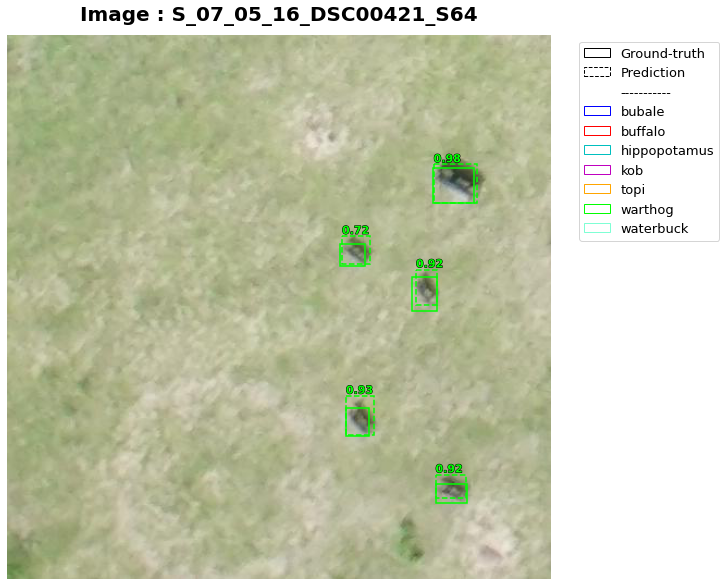

In [60]:
# -----------------------------
# Visualisation des prédictions
# -----------------------------

# Installation de mmdet
!pip install -q mmdet

import time
import matplotlib
import matplotlib.pylab as plt

%cd {mmdetection_dir}
import mmdet
from mmdet.models import build_detector
from mmdet.apis import inference_detector, init_detector

# Construction du modèle à partir du fichier de configuration et du fichier
# checkpoint
model = init_detector(config_fname, checkpoint_file)

# Test d'une image et visualisation des prédictions
img_path = '/content/mmdetection_update/data/coco/test/S_07_05_16_DSC00421_S64.JPG'

result = inference_detector(model, img_path)

# Fonction d'affichage perso
os.chdir('/content/TFE-2020/Post-processing')
import mmdet_utils

# ---
predictions = result
img_path = img_path
coco_path = '/content/mmdetection_update/data/coco/annotations/test_cocotype.json'
legend = True
title = True
score_thresh = 0.50
# ---

mmdet_utils.display(predictions, img_path, coco_path, score_thresh=score_thresh)